### Problem Set 6: Clustering

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

##### **The Dataset**

 **Source:** Estimation of Obesity Levels Based On Eating Habits and Physical Condition . (2019). UCI Machine Learning Repository. *https://doi.org/10.24432/C5H31Z.*

This is a multivariate multi classification/clustering dataset from UCI Machine Learning Repositories named Estimation of Obesity Levels Based On Eating Habits and Physical Condition. The dataset consists of <u>16 features</u>, each with <u>2111 instances</u> and a label that categorizes the data into different obesity levels ('Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II', and 'Obesity_Type_III'). Out of the 16 features, only 2 were selected to be used in the clustering model. Those features are 'Hieght' and 'Weight' for the reason that the other features are incompatible with clustering method and might affect the overall performance of the model. The label was converted into numerical value from its original categorical value then the features were normalized using MinMaxScaler. 

In [184]:
data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv', usecols=['Height', 'Weight', 'Obesity_Level'])

data.head()

,Height,Weight,Obesity_Level
0,1.62,64.0,Normal_Weight
1,1.52,56.0,Normal_Weight
2,1.80,77.0,Normal_Weight
3,1.80,87.0,Overweight_Level_I
4,1.78,89.8,Overweight_Level_II


#### Converting the label to numeric

In [171]:
encoder = LabelEncoder()

data['Obesity_Level'] = encoder.fit_transform(data['Obesity_Level'])

In [172]:
data.describe()

,Height,Weight,Obesity_Level
count,2111.000000,2111.000000,2111.000000
mean,1.701677,86.586058,3.015632
std,0.093305,26.191172,1.952090
min,1.450000,39.000000,0.000000
25%,1.630000,65.473343,1.000000
50%,1.700499,83.000000,3.000000
75%,1.768464,107.430682,5.000000
max,1.980000,173.000000,6.000000


#### Normalizing the data

In [173]:
scaler = MinMaxScaler()

data['Height'] = scaler.fit_transform(data[['Height']])
data['Weight'] = scaler.fit_transform(data[['Weight']])

data.head()

,Height,Weight,Obesity_Level
0,0.320755,0.186567,1
1,0.132075,0.126866,1
2,0.660377,0.283582,1
3,0.660377,0.358209,5
4,0.622642,0.379104,6


#### Visualizing the data using scatterplot

<Axes: xlabel='Height', ylabel='Weight'>

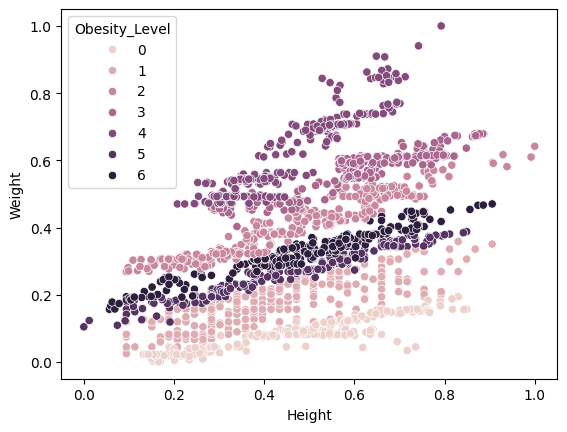

In [174]:
sns.scatterplot(data = data, x='Height', y='Weight', hue='Obesity_Level')

#### Splitting the data features and labels

In [175]:
X = data.drop('Obesity_Level', axis=1)
y = data['Obesity_Level']

#### Creating the model

In [176]:
clusters = 3

model = KMeans(n_clusters=clusters, random_state=0, n_init='auto',)

model.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=0)

#### Visualizing model predictions

<Axes: xlabel='Height', ylabel='Weight'>

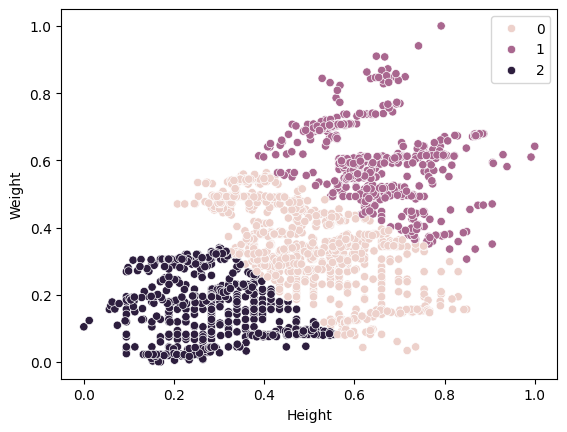

In [177]:
sns.scatterplot(data = X, x = 'Height', y = 'Weight', hue = model.labels_)

In [178]:
model.inertia_

53.76090662690903

<Axes: ylabel='Obesity_Level'>

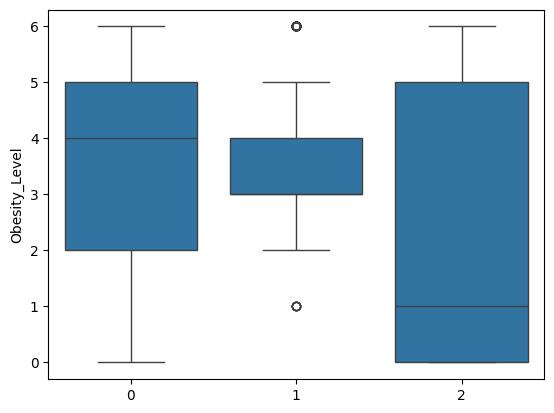

In [179]:
sns.boxplot(x = model.labels_, y = y)

#### Choosing the best number of clusters

In [180]:
K = range(2, 11)
fits = []
score = []


for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X)
    
    fits.append(model)
    
    score.append(silhouette_score(X, model.labels_, metric='euclidean'))

#### Visualizing cluster sizes

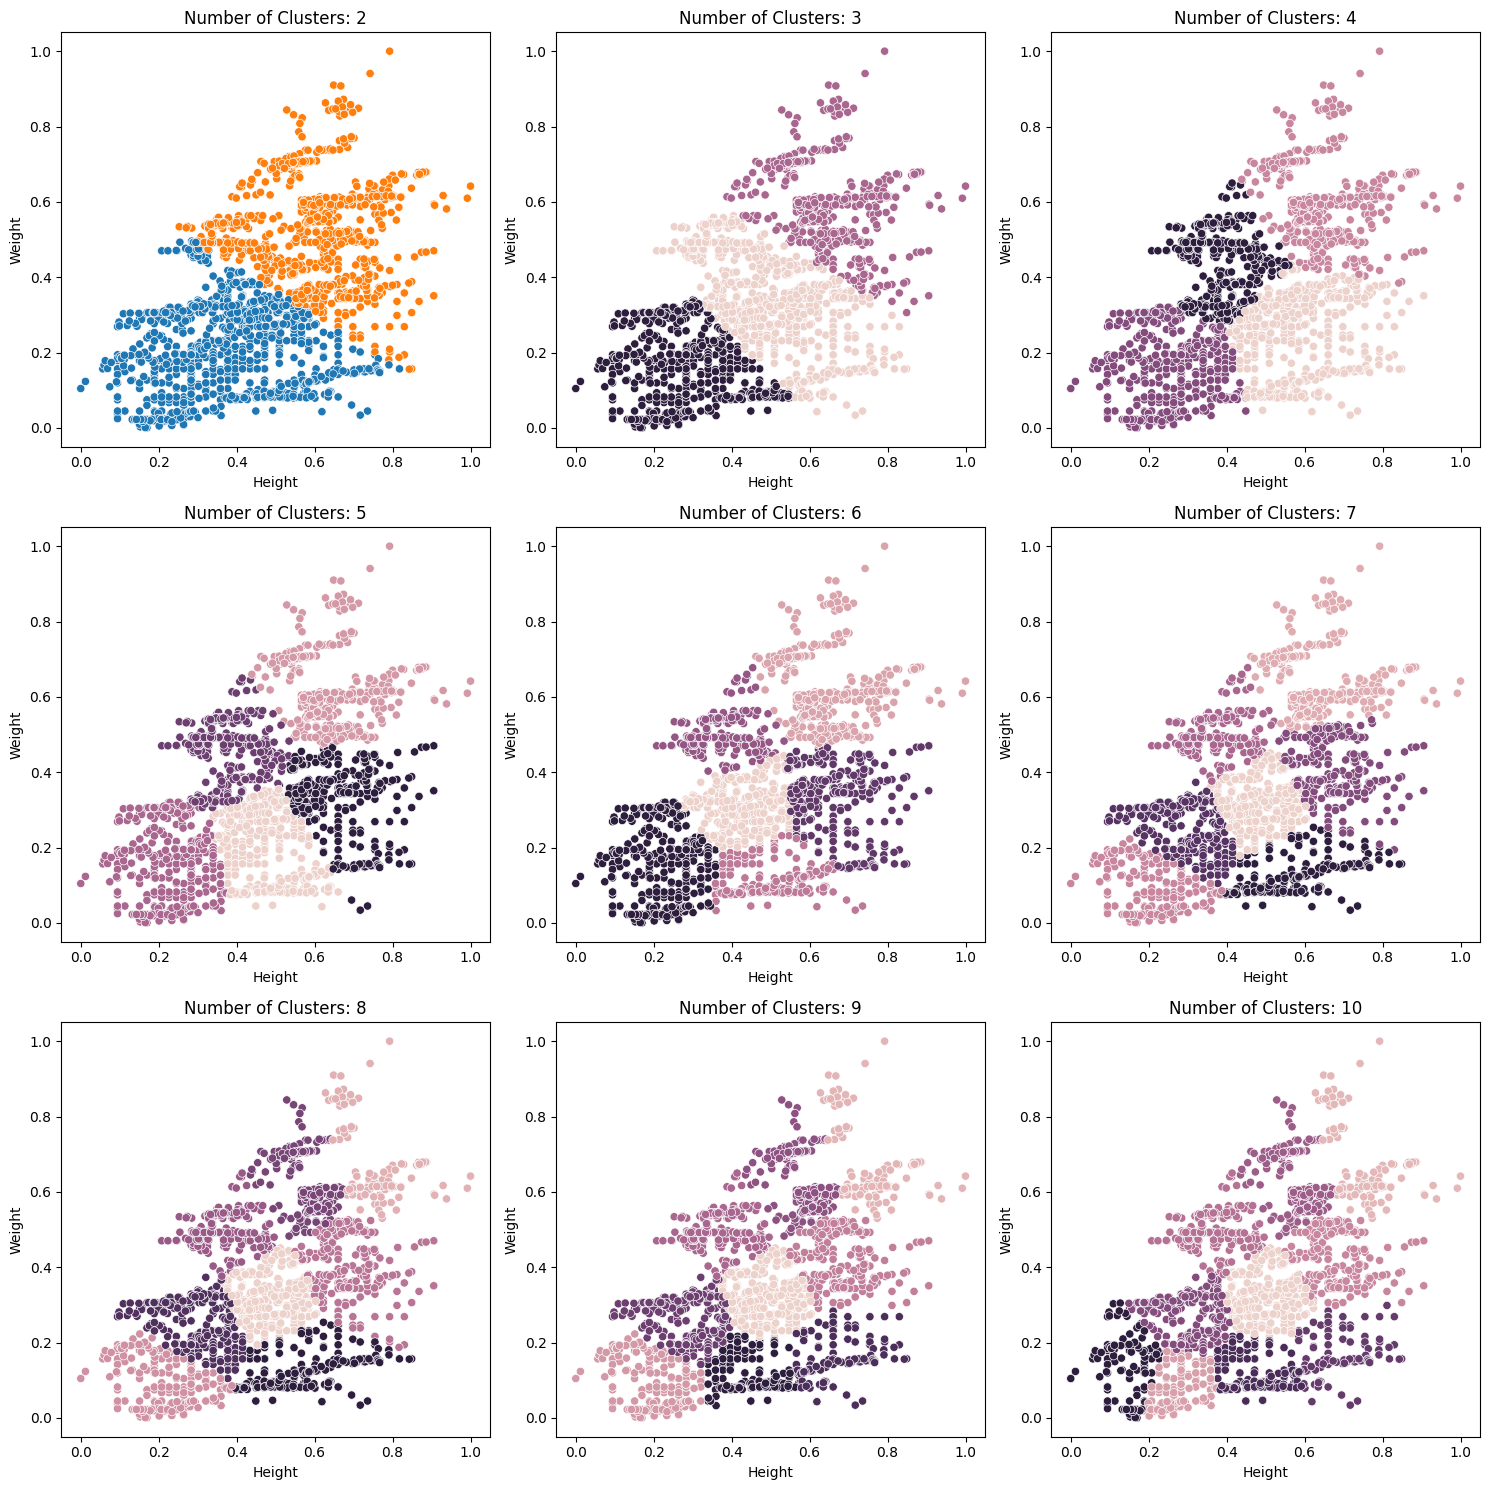

In [181]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for k, ax in zip(K, axs.flatten()):
    model = fits[k-2]
    sns.scatterplot(data=X, x='Height', y='Weight', hue=model.labels_, ax=ax)
    ax.set_title(f'Number of Clusters: {k}')
    ax.legend().set_visible(False)

plt.tight_layout()
plt.show()

#### Using elbow method to see the ideal cluster size

<Axes: >

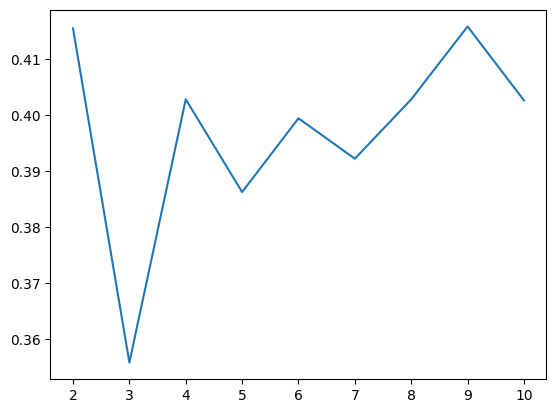

In [182]:
sns.lineplot(x = K, y = score)

#### **Results**

Using the sklearn.clustering module, we generated a KMeans model with three clusters. This model was used to group the data from the stated dataset into clusters. Using scatterplots and the elbow method, the best number of clusters was determined to be three, despite the dataset's original number of classes being seven. As seen in the line plot or the elbow approach, clusters below 3 have a high silhouette score, which gradually decreases before increasing again after cluster 3. Instead of using only two features from the dataset, adding more could increase model performance. It is also possible that the dataset is incompatible with the clustering approach due to the way the data was distributed. 